In [1]:
# imported libs for scaling
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

#custom import

import wrangle

# Exercises

* Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
# importing wrangles data
df = wrangle.wrangle_zillow()
df.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount
0,LOS ANGELES,6037,4,2.0,3633,296425,2005,6941.39
1,LOS ANGELES,6037,3,4.0,1620,847770,2011,10244.94
2,LOS ANGELES,6037,3,2.0,2077,646760,1926,7924.68
3,LOS ANGELES,6037,0,0.0,1200,5328,1972,91.60
4,LOS ANGELES,6037,0,0.0,171,6920,1973,255.17


* Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [3]:
# Split Data!
seed = 42

train, val_test = train_test_split(df, train_size=0.7,
                                   random_state=seed)

val, test = train_test_split(val_test, train_size=0.5,
                             random_state=seed)
train.shape, val.shape, test.shape

((1498164, 8), (321035, 8), (321036, 8))

__________________________________________________________________________________

In [4]:
train['tax_value'].max()

88020448

In [5]:
# additional manipulation
train = train[(train['tax_value'] < 3_000_000) & (train['tax_amount'] < 3_000_000)]

## MinMaxScaler

In [6]:
# assigned mms as variable for min max scaler function from sklearn
mms = MinMaxScaler()

# fit scaler to train
mms.fit(train[['tax_value']])

MinMaxScaler()

In [7]:
train['tax_value_mms'] = mms.transform(train[['tax_value']])
train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_mms
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039


In [8]:
# defined function to populate visual of distributions to check for shape of the data prior to and after scaling
def compare_data(scaled_col, df = train, original = 'tax_value'):
    
    plt.figure(figsize=(11, 7))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=40)
    
    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=40)
    
    plt.show()

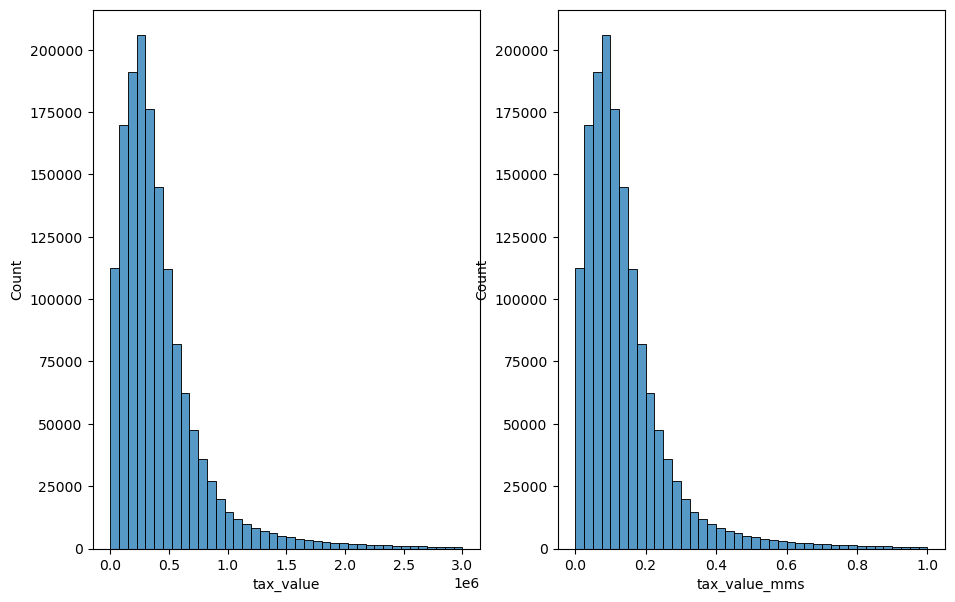

In [9]:
compare_data('tax_value_mms')

__________________________________________________________________________________

## StandardScaler

In [10]:
ss = StandardScaler()

ss.fit(train[['tax_value']])

train['tax_value_ss'] = ss.transform(train[['tax_value']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_mms,tax_value_ss
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799,1.025875
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716,0.609851
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660,-0.349120
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743,-0.835702
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039,-0.889251


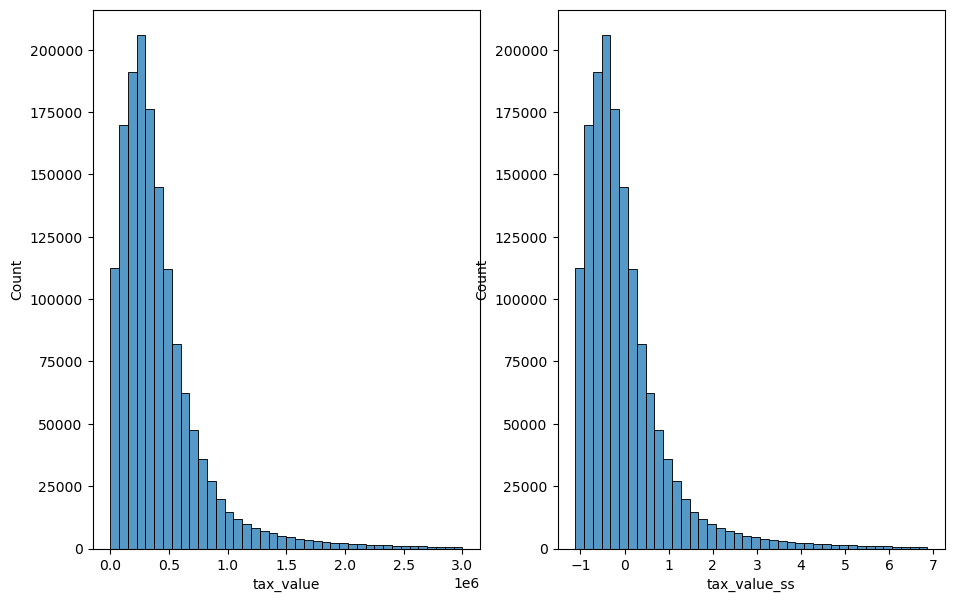

In [11]:
compare_data('tax_value_ss')

__________________________________________________________________________________

## RobustScaler

In [12]:
rs = RobustScaler()

rs.fit(train[['tax_value']])

train['tax_value_rs'] = rs.transform(train[['tax_value']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_mms,tax_value_ss,tax_value_rs
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799,1.025875,1.414798
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716,0.609851,0.954642
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660,-0.349120,-0.106057
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743,-0.835702,-0.644256
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039,-0.889251,-0.703485


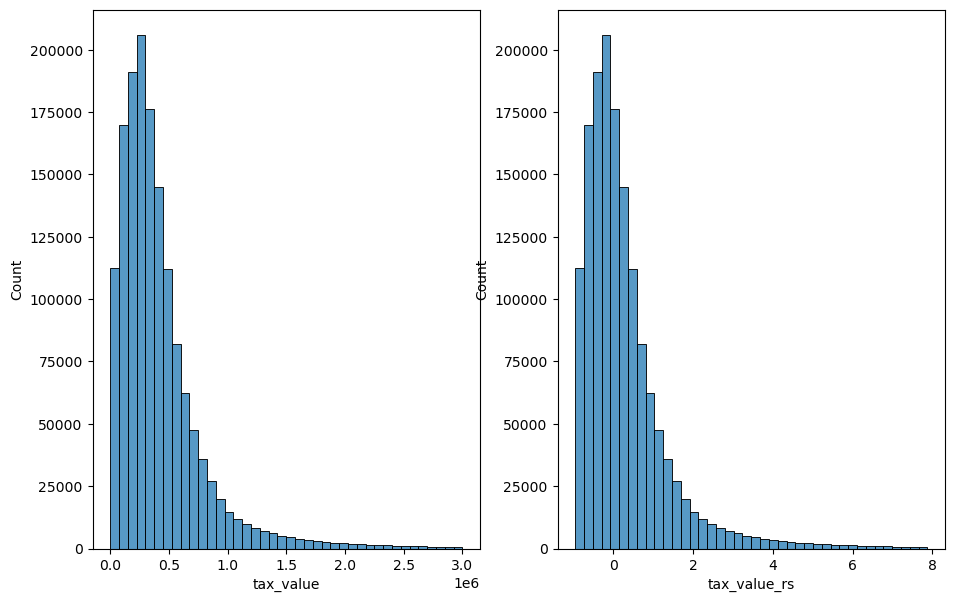

In [13]:
compare_data('tax_value_rs')

In [14]:
train.tax_value.max()

2999902

* Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

    - it looks the same, maybe there might be some slight differences not 100% sure.

In [22]:
mms = MinMaxScaler()

# fit scaler to the tax_value column in the train DataFrame
mms.fit(train[['tax_value']])

# Transformed tax_value column
train['tax_value_mms'] = mms.transform(train[['tax_value']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled,tax_value_mms
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,1.025875,0.268799
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.609851,0.216716
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,-0.349120,0.096660
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,-0.835702,0.035743
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,-0.889251,0.029039


In [23]:
# reverse transformation and obtain the original values:
train['tax_value_original'] = mms.inverse_transform(train[['tax_value_mms']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_scaled,tax_value_mms,tax_value_original
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,1.025875,0.268799,806388.0
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.609851,0.216716,650144.0
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,-0.349120,0.096660,289989.0
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,-0.835702,0.035743,107246.0
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,-0.889251,0.029039,87135.0


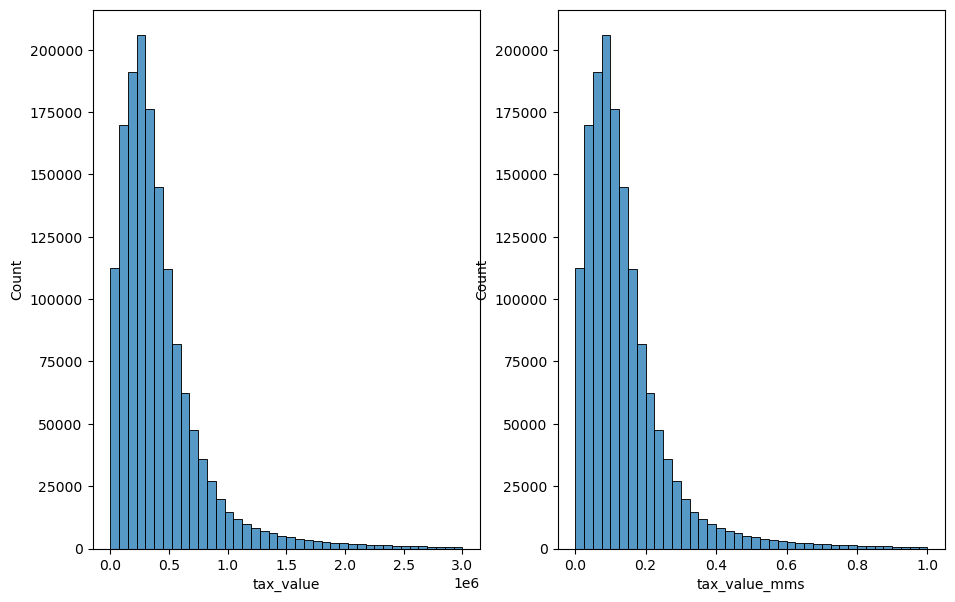

In [16]:
compare_data('tax_value_mms')

* Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)

qt.fit(train[['tax_value']])

train['tax_value_qt'] = qt.transform(train[['tax_value']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_mms,tax_value_ss,tax_value_rs,tax_value_original,tax_value_qt
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799,1.025875,1.414798,806388.0,1.229742
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716,0.609851,0.954642,650144.0,0.931824
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660,-0.349120,-0.106057,289989.0,-0.160889
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743,-0.835702,-0.644256,107246.0,-1.129932
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039,-0.889251,-0.703485,87135.0,-1.276232


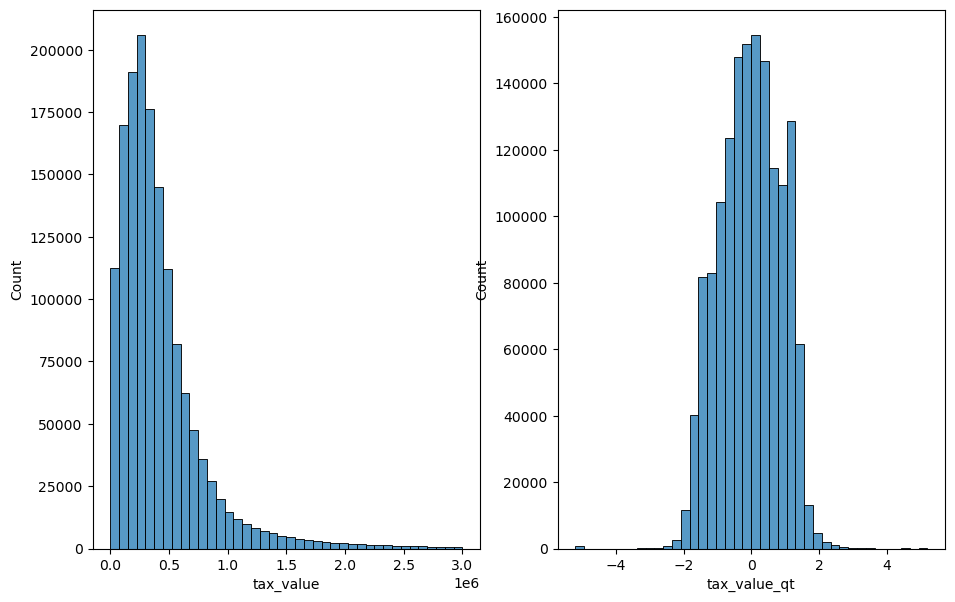

In [18]:
compare_data('tax_value_qt')

* Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [19]:
qt = QuantileTransformer(n_quantiles=10, random_state=seed)

qt.fit(train[['tax_value']])

train['tax_value_qt'] = qt.transform(train[['tax_value']])

train.head()

,county,fips,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,tax_value_mms,tax_value_ss,tax_value_rs,tax_value_original,tax_value_qt
1001601,LOS ANGELES,6037,3,2.0,2304,806388,1963,8916.05,0.268799,1.025875,1.414798,806388.0,0.890603
611989,LOS ANGELES,6037,3,2.0,2207,650144,1951,7773.05,0.216716,0.609851,0.954642,650144.0,0.824286
658616,LOS ANGELES,6037,3,2.0,1347,289989,1957,3768.32,0.096660,-0.349120,-0.106057,289989.0,0.436090
835115,LOS ANGELES,6037,3,2.0,1392,107246,1956,1414.52,0.035743,-0.835702,-0.644256,107246.0,0.129252
242295,LOS ANGELES,6037,4,2.0,1344,87135,1959,1182.90,0.029039,-0.889251,-0.703485,87135.0,0.100937


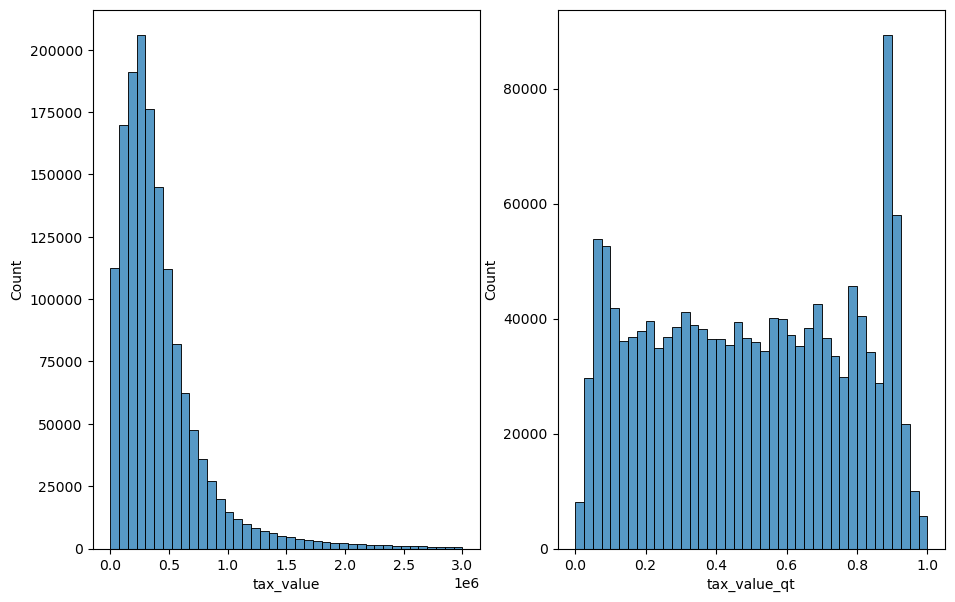

In [20]:
compare_data('tax_value_qt')

* Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

* ✔️

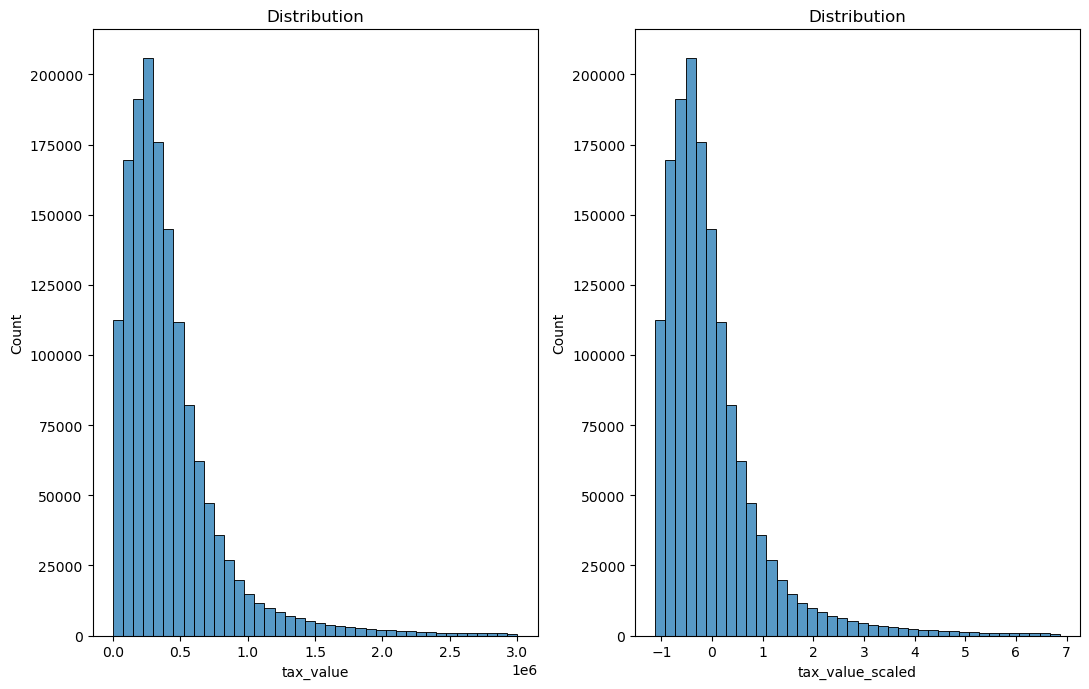

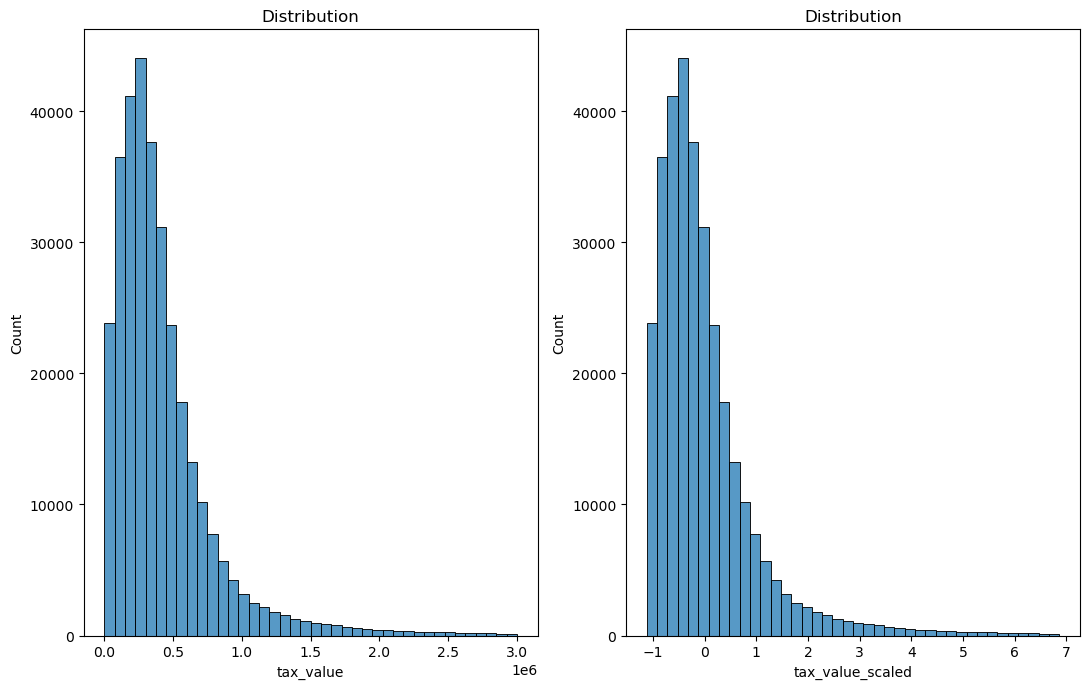

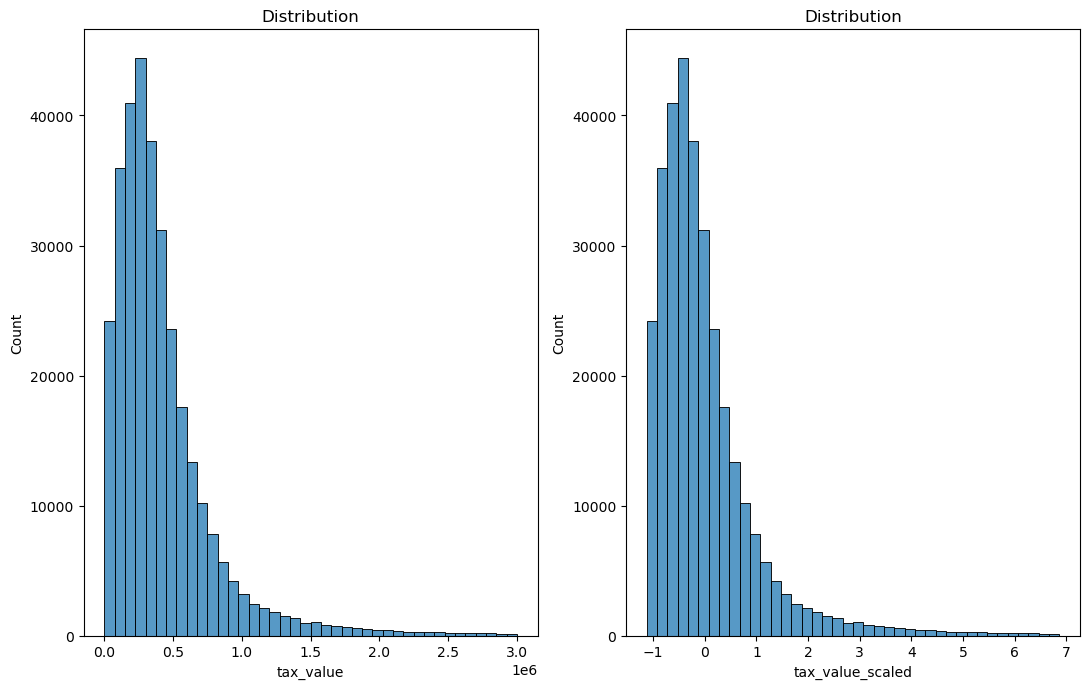

In [21]:
def compare_data(scaled_col, df=(train, val, test), original='tax_value'):
    plt.figure(figsize=(11, 7))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=40)
    plt.title(f'Distribution')
    
    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=40)
    plt.title(f'Distribution')

    plt.tight_layout()
    plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - 

# Define a function for scaling the data
def scale_data(train, val, test, scaler):
    
    # Fit the scaler on the training data
    scaler.fit(train[['tax_value']])
    
    # Transform the data for each split
    train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
    val['tax_value_scaled'] = scaler.transform(val[['tax_value']])
    test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
    
    return train, val, test

# Load and wrangle data
df = wrangle.wrangle_zillow()

# Split the data
seed = 42

train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
val, test = train_test_split(val_test, train_size=0.5, random_state=seed)

# Filter data
train = train[(train['tax_value'] < 3_000_000) & (train['tax_amount'] < 3_000_000)]
val = val[(val['tax_value'] < 3_000_000) & (val['tax_amount'] < 3_000_000)]
test = test[(test['tax_value'] < 3_000_000) & (test['tax_amount'] < 3_000_000)]

# different scalers
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)

# train, val, test = scale_data(train, val, test, mms)
train, val, test = scale_data(train, val, test, ss)
# train, val, test = scale_data(train, val, test, rs)
# train, val, test = scale_data(train, val, test, qt)

# Compare distributions for each scaled column
compare_data('tax_value_scaled', train)
compare_data('tax_value_scaled', val)
compare_data('tax_value_scaled', test)

### FINAL FUNCTION BELOW

In [24]:
# imported libs for scaling
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

#custom import
import wrangle


#-------------------------PREPARE MODULE------------------------------


# -----------------Train-Validate-Test-------------------------------
# function to subset data
def train_val_test(df, seed = 42):

    train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed)

    return train, val, test



# - - - - - - - - - - - Scale Data - - - - - - - - - - - - - - - -
# Define a function for scaling the data
def scale_data(train, val, test, scaler):
    
    # Fit the scaler on the training data
    scaler.fit(train[['tax_value']])
    
    # Transform the data for each split
    train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
    val['tax_value_scaled'] = scaler.transform(val[['tax_value']])
    test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
    
    return train, val, test



# --------------------Visualization function----------------------

def visualize_compare(scaled_col, df, original='tax_value'):
    plt.figure(figsize=(11, 7))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=40)
    plt.title(f'Distribution original')
    
    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=40)
    plt.title(f'Distribution scaled')

    plt.tight_layout()
    plt.show()


